In [ ]:
#### PUBS 2017 
#### barcode analysis 

#### the purpose of this code was to analyze the distribution of barcodes in a deep mutation scanning experiment 
#### authors <jared.lumpe@ucsf.edu> <snow.naing@ucsf.edu> <christa.caggiano@ucsf.edu> 

# Instructions

Before running, copy the files `allele_dic_with_WT.pkl`, `aminotonumber.pkl`, and `translate.pkl` to this directory.

### Load data

In [1]:
# package to read pickles in and out 

import pickle

### Barcodes

In [2]:
# opens the object using standard python i/o, calles it fobj for 'file object' since it is a file containing an object 
# uses the option 'rb' for opening the file as a read-only binary 
# 'r' because we do not want to risk overwriting the object on accident, since it will permanently change the file
# 'b' for binary file, since some operating systems (mostly windows) will by default, read it a little differently
# this makes the code able to run the same on all operating systems 

with open('data/allele_dic_with_WT.pkl', 'rb') as fobj:
    barcodes = pickle.load(fobj)
barcodes

{'GGCGCATACTTTCAATAT': (36, 'CAA'),
 'TGGGGTCTGTTGTGGTCA': (62, 'TAA'),
 'CGTATCCTTACATTTACT': (7, 'ACA'),
 'CCCAGCTGTCATAGTACG': (68, 'TAG'),
 'GTGACGAGCCAGTATTAT': (10, 'GGG'),
 'CGGTGACGAGGCCGCATA': (43, 'TAG'),
 'TCCTCACGAGACCGTTAT': (28, 'GTT'),
 'GTAAGCCCTACTAACTTT': (24, 'CGA'),
 'AGCAGATTAGTGTTATAA': (8, 'CCC'),
 'AGTCTCGGGGGGGACGGC': (41, 'GGC'),
 'GGTGGCTCAGAATGGGTT': (36, 'GGG'),
 'ATACAAGATTTTGTGCCG': (13, 'CCC'),
 'TCAGGGGGTCAAGCGTCC': (26, 'AGG'),
 'GACGTGGCGTAACACGAT': (24, 'GAT'),
 'TGATTAGGAATCACGTTG': (13, 'CGC'),
 'GCGCGCGCCTGGCGGCGA': (73, 'GCG'),
 'CATATTGAAAATGTTTAT': (75, 'CCA'),
 'CGATCTCGCGCAATACAA': (62, 'AGT'),
 'GGATGCCTCCCGGCTCGA': (42, 'CCC'),
 'GAAGCAAGAAATATACTT': (42, 'TTG'),
 'CGCAACTAGACTGCTTAC': (35, 'CAA'),
 'TGTCTATGTTATATCGCG': (0, 'WT'),
 'CTGGAGACGCCCCAAGAG': (74, 'TTC'),
 'GTCTCGCACTTTATAGGA': (31, 'TTG'),
 'TAGGCCCATCTGGAGTCG': (20, 'AGT'),
 'ATCGAGAGGACGGAGTGT': (71, 'TTT'),
 'TGCCTTAAACGCGGCTCT': (72, 'GCT'),
 'GAAGTGTAACCATTACTC': (27, 'GCT

### AA ordering

In [3]:
# same as above

with open('data/aminotonumber.pkl', 'rb') as fobj:
    aa_to_index = pickle.load(fobj)
    
print(aa_to_index)

{'A': 9, 'C': 8, 'E': 20, 'D': 19, 'G': 10, 'F': 2, 'I': 5, 'M': 6, 'H': 16, 'STOP': 0, 'L': 4, 'N': 14, 'Q': 15, 'P': 11, 'S': 12, 'R': 17, 'T': 13, 'W': 1, 'V': 7, 'Y': 3, 'K': 18}


In [4]:
# This code reverses the order of aa_to_index object that was loaded in above

# this makes a list of nones the size of the length of the object 
# ie [None] * 5 = [None, None, None, None, None]
aas_ordered = [None] * len(aa_to_index)

for aa, i in aa_to_index.items():
    assert aas_ordered[i] is None
    aas_ordered[i] = aa

assert None not in aas_ordered

In [5]:
# here the file is opened as 'wb' which means it is writable 
# so we are purposely trying to overwrite this data structure with our ordered 
# amino acid list, that's the dump function going on here 

with open('data/aas_ordered.pkl', 'wb') as fobj:
    pickle.dump(aas_ordered, fobj)

### Genetic code

In [6]:
# Load RNA version from file
# also read-only binary 

with open('data/translate.pkl', 'rb') as fobj:
    codon_to_aa = pickle.load(fobj)
    

In [7]:
# DNA version
# this is essentially a fancy for loop (read from back) --- for each amino acido in the codon to AA dict, convert it to a codon 
# then for each of those codons, replace all the T's with U's 

dna_codon_to_aa = {codon.replace('U', 'T'): aa for codon, aa in codon_to_aa.items()}

### Sequence

In [8]:
# this simply reads in our wt aa sequence we got from daniel using the read propery of a file object in python

with open('wt_seq.txt') as fobj:
    wt_seq = fobj.read()

In [9]:
# getting the number of residues in the wt sequence we were given 

prot_len = len(wt_seq)

### Build matrix

In [10]:
# numpy is a package that makes arrays/matrices, basically makes linear algebra possible 

import numpy as np

In [11]:
# intializes an empty matrix that is the length of our protein seqeunce (num of rows) 
# by the total number of aa's (21 columns) 
# specifies this as being an array that can only be of integers (no decimals) 
# it's helpful to initialize the data structure with types, even though in python you don't have to, since we are iterating 
# over the values seen in our barcode counts, which we will anticipate to be only integers

counts = np.zeros((prot_len + 1, 21), dtype=int)

In [12]:
# for each residue # and codon in our barcode dict
for res, codon in barcodes.values():
    
    # if it's the weird WT where it is a synomous variant skip it
    if codon == 'WT':
        # Skip wild-type
        continue
        
    # otherwise get the amino acid from the codon 
    aa = dna_codon_to_aa[codon]
    
    # and the index of the amino acid 
    aa_index = aa_to_index[aa]
    
    # add one to the appropriate entry of our counts matrix given our aa index 
    counts[res - 1, aa_index] += 1  # res starts at 1

In [13]:
# for each residue, get the number of times it was not mutated- ex where amino acid was a synomous mutation 

zero_location = np.where(counts == 0)

In [14]:
from collections import Counter


num_zeros_by_aa = Counter(zero_location[1]) # number of zeros by amino acid types 
values = [(num_zeros_by_aa[i]) for i in range(1,len(num_zeros_by_aa))] # separates above tupule to just the values
aminos= aas_ordered[1:] # uses the amino acid name for clarity 


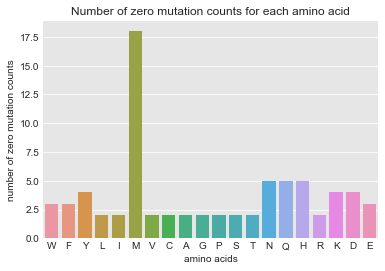

In [15]:
import seaborn # plotting library 
import matplotlib.pyplot as plt # needed to show plot inline 
%matplotlib inline

# fancy plotting things 
seaborn.set_style("darkgrid", {"axes.facecolor": ".9"})
plot = seaborn.barplot(aminos,values)
plot.set_title("Number of zero mutation counts for each amino acid")
plot.set_ylabel("number of zero mutation counts")
plot.set_xlabel("amino acids")
plot